# Neural Networks

## Importing random stuff I need

In [9]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import re
import imageio
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import csv
import sys
import tarfile
import random
from IPython.display import display, Image
from matplotlib.ticker import MaxNLocator

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

## Components that make up a neural network

1. An input layer, __x__. This can accept large volumes of data as input to build the network.
2. An arbitrary amount of __hidden layers__
3. An ouput layer, __y__
4. A set of __weights__ and __biases__ between each layer, __W and b__
5. A choice of __activation function__ for each hidden layer, __sigma__

Below is the equation of a neural network

In [49]:
%%latex
\begin{align}
Y = \sigma(W_2\sigma(W_1x + b_1) + b_2)
\end{align}

<IPython.core.display.Latex object>

It makes sense that it is the right values for the weights and bias that determine the strength of the prediction. The process of fine tuning the weights and biases of a neural network is called __training the neural network.__

Each iteration of the training process consists of the following steps: 
1. Calculating the predicted output _y_ known as __feed forward__.
2. Updating the weights and biases, known as __backpropogation__

We also need to evaluate the "goodness" of our predictions. We can do this using a __loss function__. A classic loss function is the sum of squares. The formula is below.

In [50]:
%%latex
\begin{align}
error = \sum(y_{predict} - y_{actual})^2
\end{align}

<IPython.core.display.Latex object>

Now that we have measured the error of our prediction (loss), we need to find a way to __propgate__ the error back and update our weights and biases.

In order to do this we can take the __derivative of our loss function with respect to the weights and biases__.

Because the Weight and Bias are not part of the sum of squares equation we will have to use the chain rule. Below is shown how this is done.

In [1]:
%%latex
\begin{align}
Loss(\hat{y}, y) = \sum(y - \hat{y})^2

\newline

\frac{\partial  Loss(\hat{y}, y)}{\partial W} = 
\frac{\partial  Loss(\hat{y}, y)}{\partial W} *
\frac{\partial  \hat{y}}{\partial z} *
\frac{\partial  z}{\partial W}
\quad where \: z = Wx + b

\newline

= 2(y - \hat{y}) * derivative \: of \: sigmoid * x
        
\newline

= 2(y - \hat{y}) * z(1-z) * x
        
\end{align}

<IPython.core.display.Latex object>

## Activation Functions

What does an artifical neuron do? Simply put, it calculates a "weighted sum" of its input, adds a bias and then decides whether it should be "fired" or not. 

So consider a neuron. Below is a formula of what a neuron does.

In [8]:
%%latex
\begin{align}
Y = \sum(weight * input) + bias
\end{align}

<IPython.core.display.Latex object>

## Structure of 2 Layer Neural Network

Input Layer -> Weights 1 -> Hidden Layer -> Weights 2 -> Output

So how do we decide if something should fire or not. Y can range from -inf to +inf and we need to figure out if the neuron should fire or not. This is why we have our __activation functions__.

The first thing that comes to mind as an activation function is a threshold based activation function. That is to say if the value of Y goes above some certain value, declare it actived. If it is less than the threshold, then say it's not.

Thus are decision looks like if Y > A then activate, else don't activate. 

Pretty much all we have created is a step function.

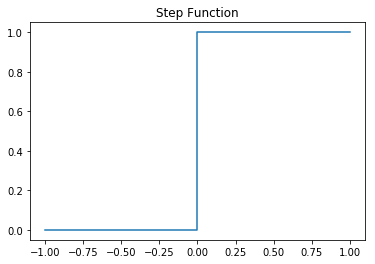

In [20]:
points = np.array([[-1, 0, 0, 1],
                   [0, 0, 1, 1]])

plt.title("Step Function")
plt.plot(points[0], points[1])

This works well but there are some problems. This would be great for a binary classifer, where there are only 2 classes but if there are more than those 2 classes. So let's say you bring in more neurons to be able to classify more classes but then now all of them get activated for some reason what class would you choose.

So we probably actually want to have a function that is not as much binary as a step function. We want a function that will tell us like this neuron is 50%, 20% or X% activated so that if mulitple neurons are activated we can choose the one that is the most active. 

Okay so really we want something that is going to give us anaolog (continous) values. The first thing that comes to my mind is a linear function.

In [21]:
%%latex
\begin{align}
Y = c * x
\end{align}

<IPython.core.display.Latex object>

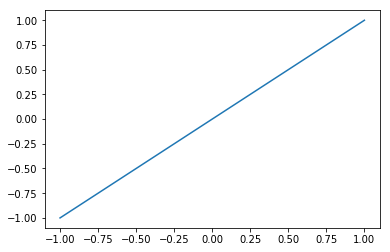

In [23]:
points = np.array([[-1, 1]
                 ,[-1, 1]])

plt.plot(points[0], points[1])

With this function we could most definetly connect a few neurons together and if more than 1 fires, we could take the max (softmax) and decided based on that.

The problem with this is when we take the gradient. It is simply equal to c, it has no relation to the X value. This will make our gradient decent much more difficult when we are trying to optimize.

There is another problem as well, just think about the connected layers. Each layer is activated by a linear function. That activation goes to the next level as input and the second layer calculates weighted sum on that input and in turn fires based on another linear activation function. This means that the final layer is nothing but just a linear function of the input of first layer. So we just lost the ability to stack layers. Also, this makes sense because a combination of linear functions in a linear manner is still just another linear function.

So maybe we should try a different function, let's try the __sigmoid function__

In [30]:
%%latex
\begin{align}
h_ \theta (x) =  \frac{1}{1 + e^{-x} }
\end{align}

<IPython.core.display.Latex object>

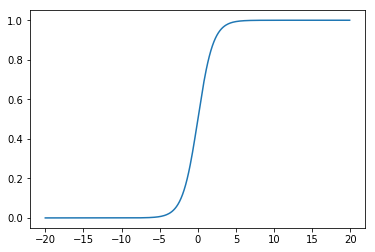

In [41]:
def sigmoid_function(x):
    return (1 / (1 + np.exp(-x)))

x_range = np.arange(-20, 20, 0.1)
y_values = np.vectorize(sigmoid_function)(x_range)

plt.plot(x_range, y_values)

Okay, so this function is nice because it has 2 properties.

1. It is non-linear
2. It is non-binary

It also has a smooth gradient that is non-constant, so that is nice. One property of the sigmoid function is that x values between -2 and 2 the Y changes very rapidly. This means that Y has a tendency to go to either extreme (1 or 0). It is also nice that the Y values are always going to stick between 0 and 1, unlike the linear function that could go from -int to inf.

The only other issue we sorta have is this, when X becomes extremely large the rate of change (gradient) shrinks. There are ways to work around this problem and sigmoid is still very popular for classification problems. 

Coming from the same ideas, is the concept of tanh. It is simply a scaled version of the sigmoid function but with slighly stronger gradients. 

### ReLu

Later comes the __ReLu__ function

In [42]:
%%latex
\begin{align}
A(x) = max(0, x)
\end{align}

<IPython.core.display.Latex object>

Text(0.5,1,'ReLu function')

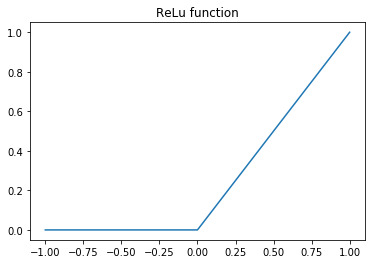

In [44]:
x = [-1, 0, 1]
y = [0, 0, 1]

plt.plot(x, y)
plt.title("ReLu function")

At first it would seem that it would have the same problem as linear functions. But the ReLu is non-linear.

Alos just imagine that with a sigmoid function most things would either be firing or not firing. That means that everything single neuron is important, we ideally want a few neurons in the network to not fire and therby making the activation more sparse and more efficient. 

However, there is some problems with the ReLu, the gradient can go towards 0. Because of the horizontal line of the ReLu, the gradient can go to 0. This means that neurons that go into that state will stop responding to variation in error. This is called the dying ReLu problem. There are variations where you set the y = 0.01x for x < 0. This will make the line slightly inclined, this is called a Leaky ReLu function. 

In a neural network the __hidden layer__ is a layer between input layers and output layers, where artificial neurons take a set of weighted inputs and produce outputs through activation function.

Every neural network has 3 types of layers:
1. __Input.__ Every single neural network must have one of this kind of layer. The number of neurons in this layer is completely determined by the number of features in your training data.
2. __Hidden__. Sometimes you may not even need a hidden layer if your data is linearly seperable. And usually the number of nodes you need in a hidden layer is the mean of the output and input layers. And often you only need a single hidden layer.
3. __Output.__ Every single neural network must have this kind of layer as well. The number is determined by the kind of NN you are trying to create. If it is a neural network trying to do regression you will only have a single output node but if you are trying to logistic classification then it is likely you will have an output class which you will probably take the softmax of.